In [1]:
import json
import pandas as pd

In [30]:
def get_target_features(all_features, white_list_features=[]):
    target_features = white_list_features
    if not white_list_features:
        target_features = all_features
    return target_features


def show_stats(data, white_list_features=[]):
    all_features = [k for k in data]
    target_features = get_target_features(all_features, white_list_features)

    for feature in target_features:
        print(f"\n{feature}\n")
        feature_metrics = data[feature]
        df = pd.DataFrame.from_dict(feature_metrics)
        display(df)


def prepare_histogram_data(data, display_format = "percent", white_list_features=[]):
    all_features = [k for k in data]
    target_features = get_target_features(all_features, white_list_features)

    feature_hists = {}
    feature_edges = {}

    for feature in target_features:
        xs = data[feature]['histogram']
        counts = data[feature]['count']
        hists = {}
        feature_edges[feature] = []
        for i, ds in enumerate(xs):
            ds_hist = xs[ds]
            ds_bucket_counts = []
            for bucket in ds_hist:
                if i == 0:
                    feature_edges[feature].append(bucket[0])
                if display_format == "percent":
                    ds_bucket_counts.append( round( bucket[2]/counts[ds], 2) )    
                else:
                    ds_bucket_counts.append(bucket[2])
                    
                hists[ds] = ds_bucket_counts
        feature_hists[feature] = hists

    return feature_hists, feature_edges


def show_histograms(data, display_format = "percent", white_list_features=[]):
    print("prepare")
    (hists, edges) = prepare_histogram_data(data, display_format, white_list_features)

    all_features = [k for k in edges]
    target_features = get_target_features(all_features, white_list_features)

    for feature in target_features:
        hist_data = hists[feature]
        index = edges[feature]
        df = pd.DataFrame(hist_data, index=index)
        axes = df.plot.line(rot=40)
        axes = df.plot.line(rot=40, subplots=True)


In [15]:
with open('adults_stats.json', 'r') as f:
    data = json.load(f)

In [27]:
show_stats(data, ['Age','fnlwgt'])


Age



,count,mean,sum,stddev,histogram
site-2-train,13025,38.7491,504707,13.8250,"[[0.0, 12.0, 0], [12.0, 24.0, 1992], [24.0, 36..."
site-2-test,3256,38.8409,126466,13.9473,"[[0.0, 12.0, 0], [12.0, 24.0, 462], [24.0, 36...."
site-1-train,26049,38.5541,1004296,13.6596,"[[0.0, 12.0, 0], [12.0, 24.0, 3849], [24.0, 36..."
site-1-test,6512,38.6918,251961,13.5640,"[[0.0, 12.0, 0], [12.0, 24.0, 923], [24.0, 36...."
Global-train,39074,38.6191,1509003,13.7151,"[[0.0, 12.0, 0], [12.0, 24.0, 3849], [24.0, 36..."
Global-test,9768,38.7415,378427,13.6924,"[[0.0, 12.0, 0], [12.0, 24.0, 923], [24.0, 36...."



fnlwgt



,count,mean,sum,stddev,histogram
site-2-train,13025,188377.9393,2453622659,105717.8039,"[[9395.135416137704, 104992.2943100565, 2638],..."
site-2-test,3256,193666.9567,630579611,105613.6296,"[[9395.135416137704, 104992.2943100565, 599], ..."
site-1-train,26049,190260.7545,4956102394,105994.6832,"[[9395.135416137704, 104992.2943100565, 5010],..."
site-1-test,6512,187848.7405,1223270998,103737.6297,"[[9395.135416137704, 104992.2943100565, 1317],..."
Global-train,39074,189633.1334,7409725053,105904.8348,"[[9395.1354, 104992.2943, 5010], [104992.2943,..."
Global-test,9768,189788.1459,1853850609,104397.3412,"[[9395.1354, 104992.2943, 1317], [104992.2943,..."


prepare


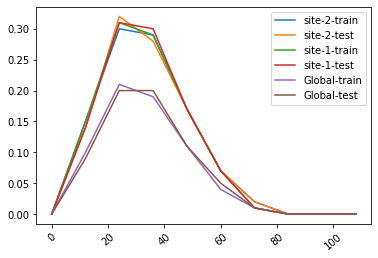

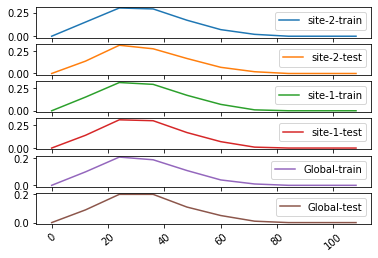

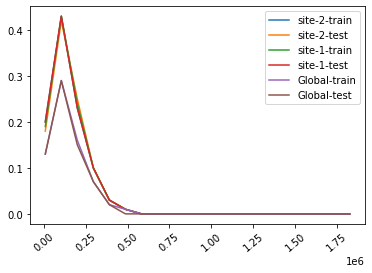

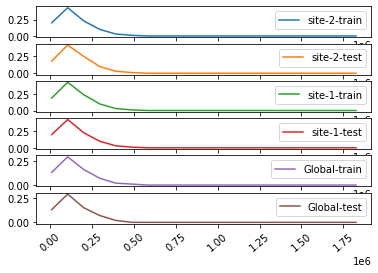

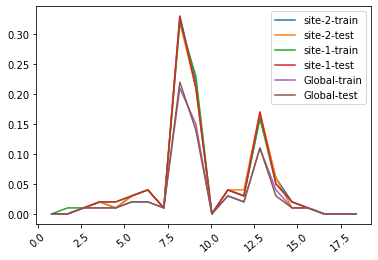

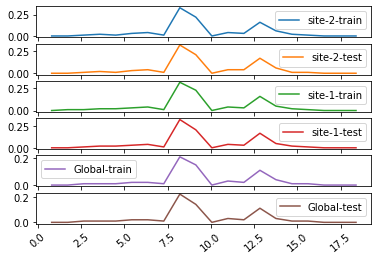

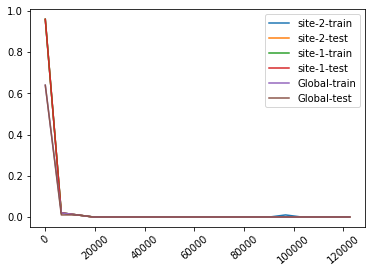

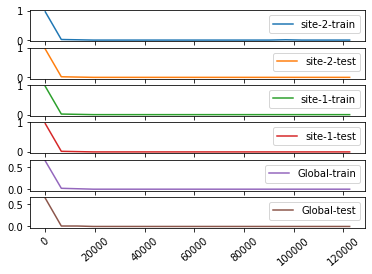

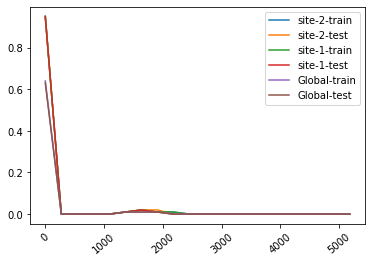

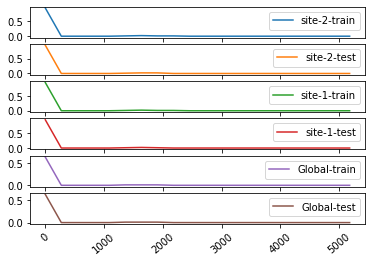

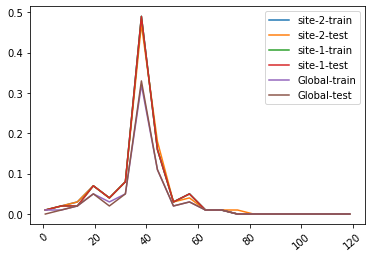

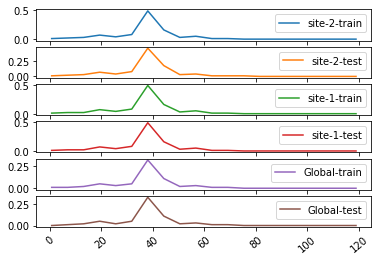

In [32]:
show_histograms(data, "percent")